<a href="https://colab.research.google.com/github/wang201156/ycps0218/blob/main/EX03_06_%E5%87%BA%E7%94%9F%E4%BA%BA%E5%8F%A3%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!wget -O births.xls https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [ ]:

url = 'https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls'
excel_data = pd.ExcelFile(url)

area = ['新北市','臺北市','桃園市','臺中市','臺南市','高雄市']
year = [str(i) for i in range(112, 98, -1)] # 從99年開始縣市合併

df = pd.DataFrame()
for sheet_name in excel_data.sheet_names:
    if sheet_name in year:
        df_yr = pd.read_excel(excel_data, sheet_name=sheet_name, header=4)
        df_yr = df_yr.iloc[:,0:2] # 只留前二欄：縣市及出生人口數
        df_yr.iloc[:, 0] = df_yr.iloc[:, 0].str.replace(" ", "") # 去除早期資料中縣市名稱中間有空白
        df_yr.columns = ['county','births']
        df_yr = df_yr[df_yr['county'].isin(area)] # 篩選只留下六都的資料
        df_yr.loc[:,'year'] = f'{sheet_name:>03}' # 補足99年數字為三位數
        df = pd.concat([df,df_yr], ignore_index=True)
df


In [ ]:
pvt1 = pd.pivot_table(df, values='births', index='year', aggfunc='mean')
print(pvt1)

依年份計算出生數的平均值，並繪製折線圖

<Axes: xlabel='year', ylabel='births'>

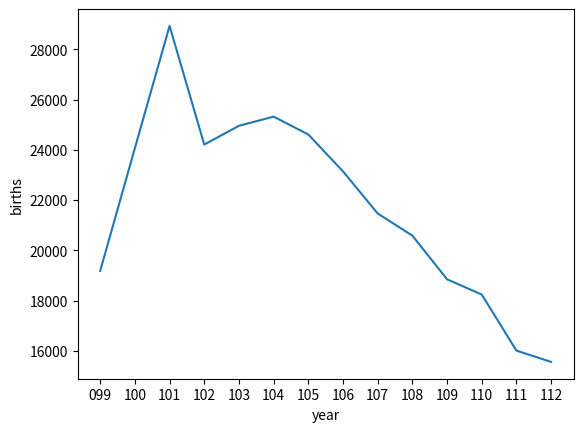

In [26]:
sns.lineplot(data=pvt1, x="year", y="births")



依年份觀察各縣市的出生數，並繪製折線圖

<Axes: xlabel='year'>

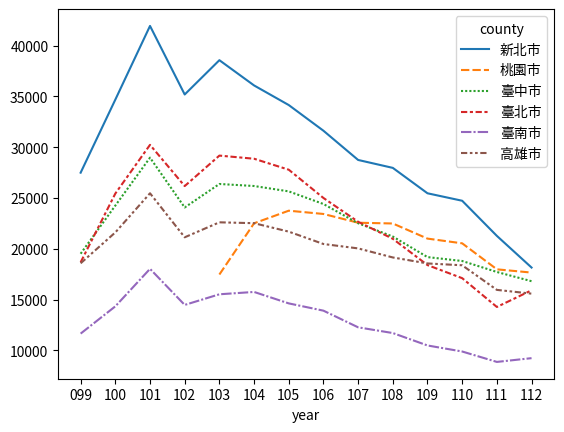

In [27]:
pvt2 = pd.pivot_table(df, values='births', index='year',columns='county')

sns.lineplot(data=pvt2)


依縣市觀察平均最大最小出生數，並繪製長條圖

<Axes: xlabel='county', ylabel="('mean', 'births')">

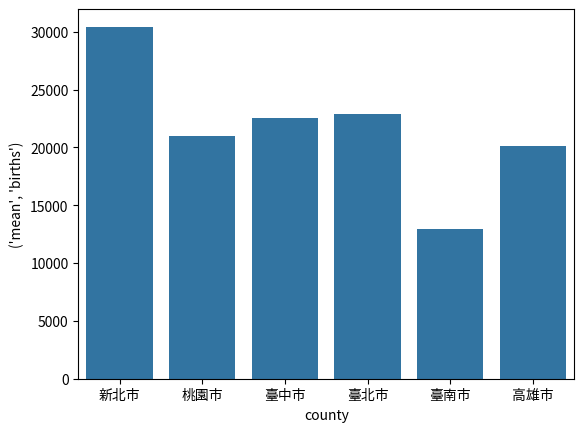

In [30]:
pvt3 = pd.pivot_table(df, values='births',index='county',aggfunc=["max","mean","min"])

sns.barplot(data=pvt3,x="county",y=("mean","births"))

依縣市出生數繪製箱形圖

<Axes: xlabel='county', ylabel='births'>

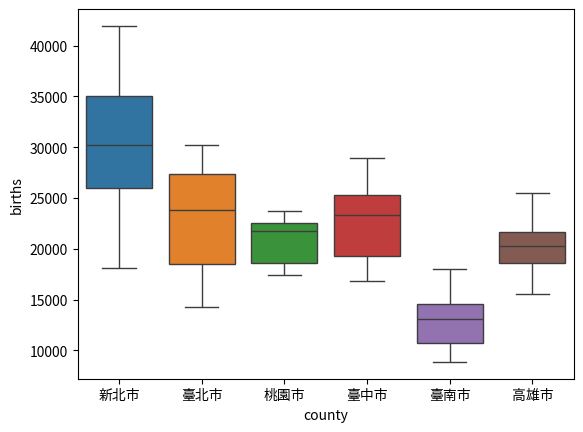

In [29]:
sns.boxplot(data=df,x="county",y="births",hue="county")